Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.

'ScheduledDay'Refer to the day the patient scheduled the appointment
'AppointmentDay'It means the appointment reserved for the patient
'Neighbourhood'indicates the location of the hospital

what is the Factors that anticipate if the patient will show up or not?

In [4]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Wrangling

In [10]:
# Load the data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv' , sep=';')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,29/04/2016 21:38,29/04/2016 03:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,29/04/2016 19:08,29/04/2016 03:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,29/04/2016 19:19,29/04/2016 03:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,29/04/2016 20:29,29/04/2016 03:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,29/04/2016 19:07,29/04/2016 03:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#find the number of the row and colum
df.shape

(110527, 14)

In [14]:
#finding the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


so There is no missing information bec the non-null =the num of rows

In [15]:
#for more info
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


so the mean age:37 years 
the max age: 115 years
but the min is -1 which there something worng

Dara cleaning

In [36]:
#first i will rename the "no-show"
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [37]:
#correcting Hipertension 
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#correcting the data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [ ]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Exploratory Data Analysis
A general look on the data

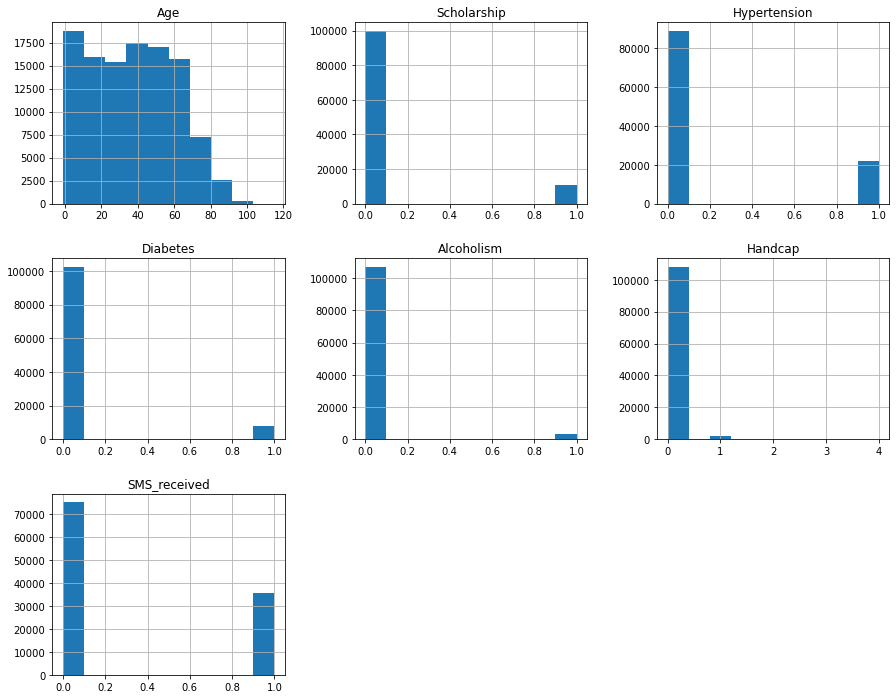

In [47]:
df.hist(figsize= (15,12));

-As you can see most of the patients didn't suffer from chronic diseases or handicapped
-the number of patient who received an SMS is half number of those who did not
-About 18% (20000 out of 110000)suffered from hypertension

In [55]:
#Assiging names to show and no show to facilliate recalling
show = df.No_show == 'No'
noshow= df.No_show == 'Yes'

In [50]:
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

In [56]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

so the number of those who showed at the hospital was about 4 times those who didnt show up

Analysing other characteristics

Text(0, 0.5, 'Patients Nymber')

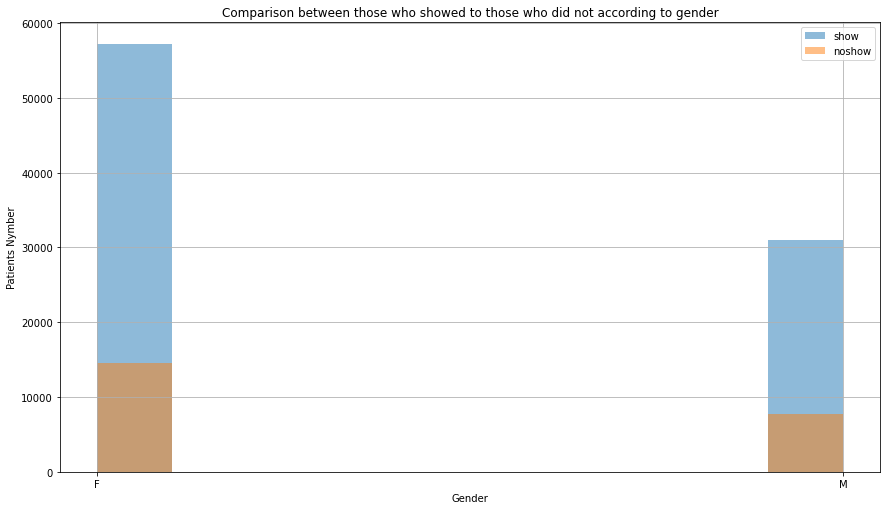

In [59]:
# Compare those who showed to those who didn't according to gender.

plt.figure(figsize=[14.70, 8.27]) #putting the size
df.Gender[show].hist(alpha= 0.5, label='show')
df.Gender[noshow].hist(alpha= 0.5, label='noshow')
plt.legend()
plt.title('Comparison between those who showed to those who did not according to gender')
plt.xlabel('Gender')
plt.ylabel('Patients Nymber')


In [61]:
# Compare those who showed to those who didn't according to gender.
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


i can say that females showed up to their appointment more than the males so this factor predict if the patients will show up or not

Text(0, 0.5, 'Patients Nymber')

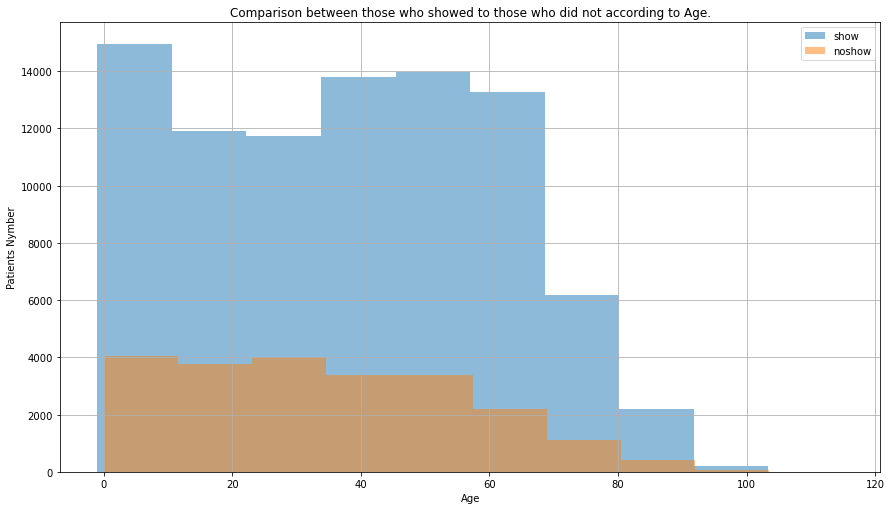

In [68]:
# Compare those who showed to those who didn't according to Age.

plt.figure(figsize=[14.70, 8.27]) #putting the size
df.Age[show].hist(alpha= 0.5, label='show')
df.Age[noshow].hist(alpha= 0.5, label='noshow')
plt.legend()
plt.title('Comparison between those who showed to those who did not according to Age.')
plt.xlabel('Age')
plt.ylabel('Patients Nymber')

the age is important factor that will predict if the patients will show up or not  
also Patient in the age group 1-10 showed more than all the other age grou, followed by the age group 35-70.
and the older they get the less they tend to get an appointment so we should take that into consideration

Text(0, 0.5, 'Patients Nymber')

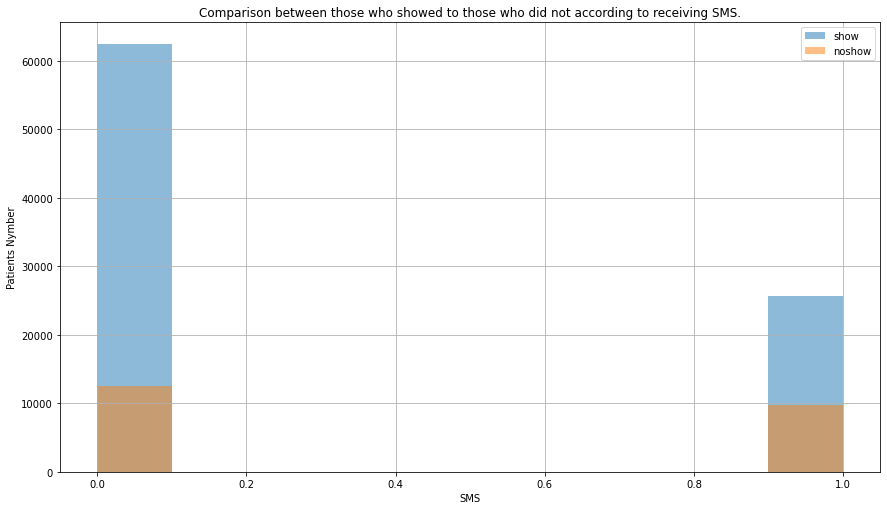

In [67]:
# Compare those who showed to those who didn't according to receiving SMS.

plt.figure(figsize=[14.70, 8.27]) #putting the size
df.SMS_received[show].hist(alpha= 0.5, label='show')
df.SMS_received[noshow].hist(alpha= 0.5, label='noshow')
plt.legend()
plt.title('Comparison between those who showed to those who did not according to receiving SMS.')
plt.xlabel('SMS')
plt.ylabel('Patients Nymber')

This is confusing, because usually if the patient does not receive a message, he/she usually does not come because it reminds them, but this is an important factor that should be looked at

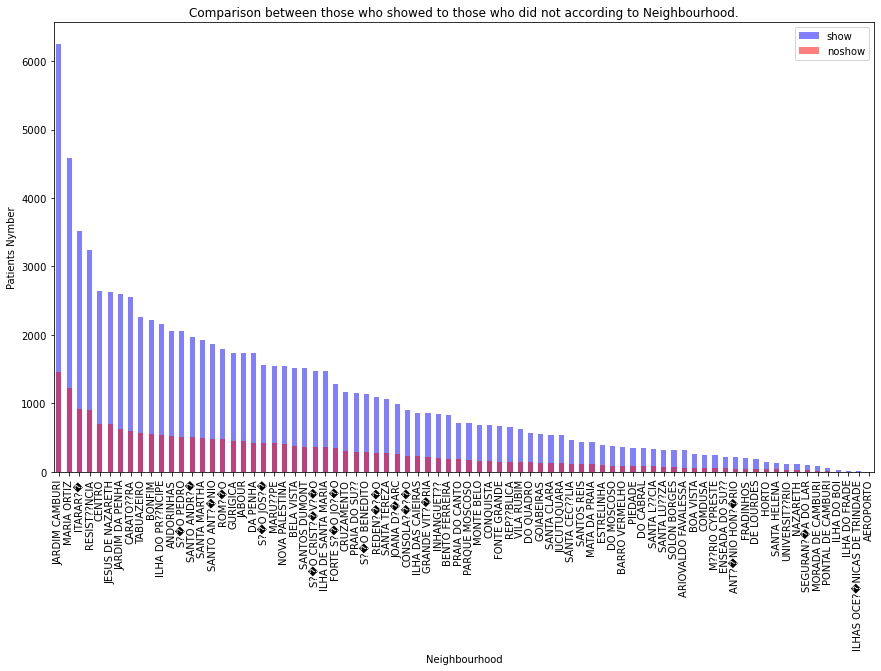

In [71]:
#Comparison between those who showed to those who did not according to Neighbourhood.
plt.figure(figsize=[14.70, 8.27])
df.Neighbourhood[show].value_counts().plot (kind='bar', alpha=0.5, color='blue', label='show')
df.Neighbourhood[noshow].value_counts().plot (kind='bar', alpha=0.5, color='red', label='noshow')
plt.legend()
plt.title('Comparison between those who showed to those who did not according to Neighbourhood.')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Nymber');

As is clear, the neighborhood can greatly affect the patient's presence

Cnoclusions
In the end, I chose some of the factors that I think are important that expect the patient to attend or not. In fact, many things have been clarified and are very important for the clinic to take a look at them through the graphics and chart to know more, and from the shock, I expected that patients of old ages attend more than those of younger age, but this is the importance of data analysis